# Loader

Here we prepare a list containing all our slices from all the acquisitions in `spineGeneric_201904271322`


In [4]:
import nibabel as nib
import numpy as np
import json
import os
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

In [2]:
with open('paths_small.json') as json_data:
    paths_centers = json.load(json_data,)

paths_centers = paths_centers['bids_path']
paths_subjects = []
paths_acq = []

#ds_raw will list all the pixel matrixes from the slices
ds_raw = []

for center in paths_centers:
    
    sub_list = [sub for sub in os.listdir(center) if "sub" in sub]
    
    for subject in sub_list:
        path_subject = os.path.join(center, subject)        
        
        contrasts_lst = ["_T1w.nii.gz", "_T2w.nii.gz", "_T2star.nii.gz",
                        "_acq-T1w_MTS.nii.gz" , "_acq-MTon_MTS.nii.gz", 
                         "_acq-MToff_MTS.nii.gz"]

        for contrast in contrasts_lst:
            dest = subject + contrast
            path_acq = os.path.join(path_subject, "anat", dest)
            if os.path.exists(path_acq):
                paths_acq.append(path_acq)

for acq in tqdm_notebook(paths_acq, unit = "subject"):
    
    slices = nib.load(acq).get_data()
    
    for i in range(np.shape(slices)[2]):
        ds_raw.append(slices[:,:,i])
    

#at this point ds contains all the entire slices


# Preprocessing

Here we pre-process the data to ease the clustering :
- center the images around the regions of interest
- normalize the intensity and brightness of the dataset (?)

In [3]:
#we crop the images
ds_cropped = [sl[110:240,110:240] for sl in ds_raw]


#for now we do not add any normalization in brightness
ds = ds_cropped

And we add a visualization tool for qc

In [ ]:
qc = plt.figure()
for sl in ds:
    ax = fig.add_subplot()

In [9]:
ex = "../duke/projects/ivado-medical-imaging/spineGeneric_201904271322/result/juntendo-750w_spineGeneric/sub-04/anat/sub-04_T1W.nii.gz"


img = nib.load(ex).get_data()

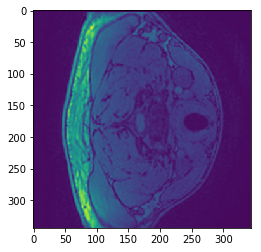

In [10]:
sl = img[:,:,1]
np.shape(sl)


plt.imshow(sl)

[]

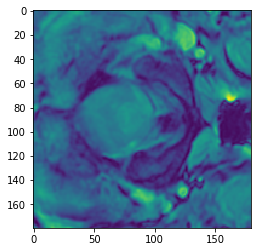

In [14]:
plt.figure()
for sl in ds:
    plt.imshow(sl)
plt.plot()

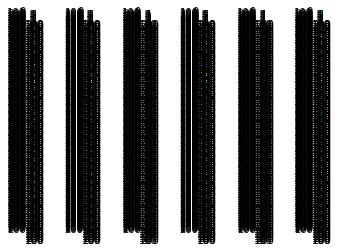

In [19]:
ncols = 6
nrows = int(np.ceil(len(ds)/6))
i,j = 0,0

for sl in ds:
    plt.subplot(nrows, ncols, i * nrows + j + 1)
    plt.imshow(sl)
    j += 1
    if j >= nrows:
        j = 0
        i += 1

plt.show()